# *ADMISSION PREDICTION*

In [1]:
#import packages
import pandas as pd
import numpy as np

#to plot within notebook
import matplotlib.pyplot as plt
%matplotlib inline

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

#read the file
df = pd.read_csv('college admission prediction.csv')

#print the head
df.head()

,Year,10th Marks,12th Marks,12th Division,AIEEE Rank,College
0,2015,95,92,2,100,IIT delhi
1,2015,75,88,3,1023,VIT vellore
2,2015,83,84,6,2935,Ahemedabad IT
3,2015,75,91,8,5647,University college of ENGG
4,2015,94,94,9,3564,SRMIST chennai


In [2]:
df


,Year,10th Marks,12th Marks,12th Division,AIEEE Rank,College
0,2015,95,92,2,100,IIT delhi
1,2015,75,88,3,1023,VIT vellore
2,2015,83,84,6,2935,Ahemedabad IT
3,2015,75,91,8,5647,University college of ENGG
4,2015,94,94,9,3564,SRMIST chennai
...,...,...,...,...,...,...
999,2019,89,81,3,4523,IIT jodhpur
1000,2019,93,88,1,5511,BIT Mesra
1001,2019,86,93,1,100,IIT Bombay
1002,2019,85,89,9,515,IIT hydrabad


In [3]:
college=np.unique(df['College'])
print(college)
clg_code=[]
for i in range(len(college)):
    clg_code.append(i+1)
# clg_code
df['College']=df['College'].replace(college,clg_code)
bak_college=np.array(df['College'])
df.head()

['Ahemedabad IT' 'BIT Mesra' 'BITS pilani' 'BMS college of ENGG'
 'DTU delhi' 'HBUT kanpur' 'IIEST shibpur' 'IIIT hydrabad' 'IIT Bombay'
 'IIT bhilai' 'IIT delhi' 'IIT goa' 'IIT guwahati' 'IIT hydrabad'
 'IIT indore' 'IIT jammu' 'IIT jodhpur' 'IIT kanpur' 'IIT kharagpur'
 'IIT mandi' 'IIT palakkad' 'IIT ropar' 'IIT tirupati'
 'Jadavpur Univversity' 'KLEF hydrabad' 'MNIT jaipur' 'MNNIT allahabad'
 'MSIT' 'Manipal IT' 'NIT trichy' 'NIT warangal' 'NMIMS'
 'Netaji Subhas IT' 'S O A  university' 'SRMIST chennai'
 'SSN college of ENGG' 'University college of ENGG' 'VIT vellore']


,Year,10th Marks,12th Marks,12th Division,AIEEE Rank,College
0,2015,95,92,2,100,11
1,2015,75,88,3,1023,38
2,2015,83,84,6,2935,1
3,2015,75,91,8,5647,37
4,2015,94,94,9,3564,35


In [4]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split

# Using only one feature
x = df.iloc[:, 4].values
y = df.iloc[:, 5].values

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=0)

print('Shape of X_train:: ', x_train.shape)
print('Shape of y_train:: ', y_train.shape)
print('Shape of X_test:: ', x_test.shape)
print('Shape of y_test:: ', y_test.shape)

x_train= x_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)

print('\nShape of X_train:: ', x_train.shape)
print('Shape of y_train:: ', y_train.shape)
print('Shape of X_test:: ', x_test.shape)
print('Shape of y_test:: ', y_test.shape)

Shape of X_train::  (803,)
Shape of y_train::  (803,)
Shape of X_test::  (201,)
Shape of y_test::  (201,)

Shape of X_train::  (803, 1)
Shape of y_train::  (803,)
Shape of X_test::  (201, 1)
Shape of y_test::  (201,)


Coefficient: [0.00021998]
RMSE: 11.64


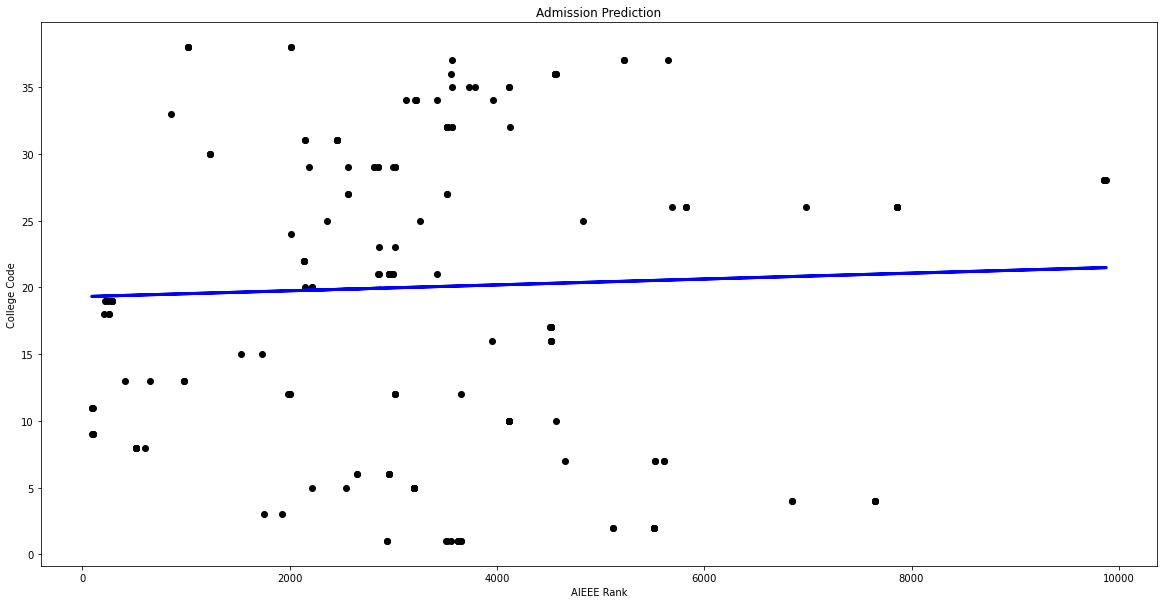

[19.77181098 20.58375941 20.05558597 19.41544239 20.00631031 19.96539392
 20.05470604 19.36440689 20.985444   20.00631031 19.32261057 20.51446552
 19.77181098 19.86552272 20.10662147 19.52719254 20.29646473 20.20847249
 19.96539392 20.29470489 19.94779547 19.49001582 19.41544239 19.84242475
 19.73771398 20.07648412 20.55362206 20.10552156 20.29646473 19.52719254
 20.07648412 20.08572331 20.58375941 21.47028126 19.84242475 19.51883328
 19.32195063 19.9656139  20.20847249 19.84242475 20.51842517 20.51446552
 19.7421136  20.29646473 19.36440689 20.00917006 19.93239682 19.92073785
 20.985444   19.35934734 19.9293171  19.86618266 19.36440689 20.30570392
 20.29712467 20.00939004 19.32415044 20.53668356 20.12180013 19.68865831
 20.00631031 20.29712467 19.96187423 19.96187423 19.57316849 19.95901448
 19.35098807 20.09848218 19.63938265 20.07648412 19.96473397 19.72583503
 21.03032005 20.20847249 19.35824743 20.58375941 20.10662147 20.00939004
 20.07648412 20.42911304 20.51842517 19.96473397 19

In [5]:
model = linear_model.LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print('Coefficient:', model.coef_)
print("RMSE: %.2f" % np.sqrt(np.mean((model.predict(x_test) - y_test) ** 2)))

plt.figure(figsize=(20,10))
plt.scatter(x_test, y_test,  color='black')
plt.plot(x_test, y_pred, color='blue', linewidth=3)

plt.xlabel("AIEEE Rank")
plt.ylabel("College Code")
plt.title("Admission Prediction")
plt.show()
print(y_pred)

In [6]:
col=df.columns.tolist()[4:5]
print(col)
usrip=[]
for i in col:
    print("==================================================")
    usrip.append(eval(input(i+": ")))
    print(usrip)

userpreddt=model.predict([usrip])
print("You may have a chance to get entrance in: ",college[clg_code.index(int(userpreddt[0]))])

['AIEEE Rank']


: 